# ***Heart Attack Analysis & Prediction Dataset***
## **dataset for heart attack classification:** 
### **About this dataset**
- 1. Age : Age of the patient
- 2. Sex : Sex of the patient
- 3. exang: exercise induced angina (1 = yes; 0 = no)
- 4. caa: number of major vessels (0-3)
- 5. cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- 6. trtbps : resting blood pressure (in mm Hg)
- 7. chol : cholestoral in mg/dl fetched via BMI sensor
- 8. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- 9. rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- 10. thalach : maximum heart rate achieved
- 11. oldpeak: ST depression induced by exercise relative to rest
- 12. slp: the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)
- 13. thall: Thal rate( 2 = normal; 1 = fixed defect; 3 = reversable defect)
- 14. target : 0= less chance of heart attack 1= more chance of heart attack

# Preprocessing
- Read data
- Check and Drop missing value 
- Target(num) 1,2,3,4 - have more chance of heart attack. Therefore, they will be assign to value of 1 so that logistic regression can be used later on.
- Convert datatype from int to factor.

In [1]:
heart <- read.table('processed.cleveland.data',sep=',')
names(heart) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
head(heart)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [2]:
# Drop missing value
heart <- heart[-c(88,167,193,267,288,303),] 

# Assign new value
heart$num[heart$num == 2] <- 1
heart$num[heart$num == 3] <- 1
heart$num[heart$num == 4] <- 1

In [3]:
# Change Data Type and Level to factor
heart$sex <- factor(heart$sex)
levels(heart$sex) <- c("female", "male")

heart$cp <- factor(heart$cp)
levels(heart$cp) <- c("typical","atypical","non-anginal","asymptomatic")

heart$fbs <- factor(heart$fbs)
levels(heart$fbs) <- c("false", "true")

heart$restecg <- factor(heart$restecg)
levels(heart$restecg) <- c("normal","stt","hypertrophy")

heart$exang <- factor(heart$exang)
levels(heart$exang) <- c("no","yes")

heart$slope <- factor(heart$slope)
levels(heart$slope) <- c("upsloping","flat","downsloping")

heart$ca <- factor(heart$ca)

heart$thal <- factor(heart$thal)
levels(heart$thal) <- c("normal","fixed","reversable")

heart$num <- factor(heart$num) 

In [4]:
summary(heart)

      age            sex                 cp         trestbps    
 Min.   :29.00   female: 96   typical     : 23   Min.   : 94.0  
 1st Qu.:48.00   male  :201   atypical    : 49   1st Qu.:120.0  
 Median :56.00                non-anginal : 83   Median :130.0  
 Mean   :54.54                asymptomatic:142   Mean   :131.7  
 3rd Qu.:61.00                                   3rd Qu.:140.0  
 Max.   :77.00                                   Max.   :200.0  
      chol          fbs             restecg       thalach      exang    
 Min.   :126.0   false:254   normal     :147   Min.   : 71.0   no :200  
 1st Qu.:211.0   true : 43   stt        :  4   1st Qu.:133.0   yes: 97  
 Median :243.0               hypertrophy:146   Median :153.0            
 Mean   :247.4                                 Mean   :149.6            
 3rd Qu.:276.0                                 3rd Qu.:166.0            
 Max.   :564.0                                 Max.   :202.0            
    oldpeak              slope    

-----------------

# Exploration
- Plot Histogram of each predictor variable to check distribution and outlier
- logit plot to check transformation on predictor variable
- Check multicolinearity Problem

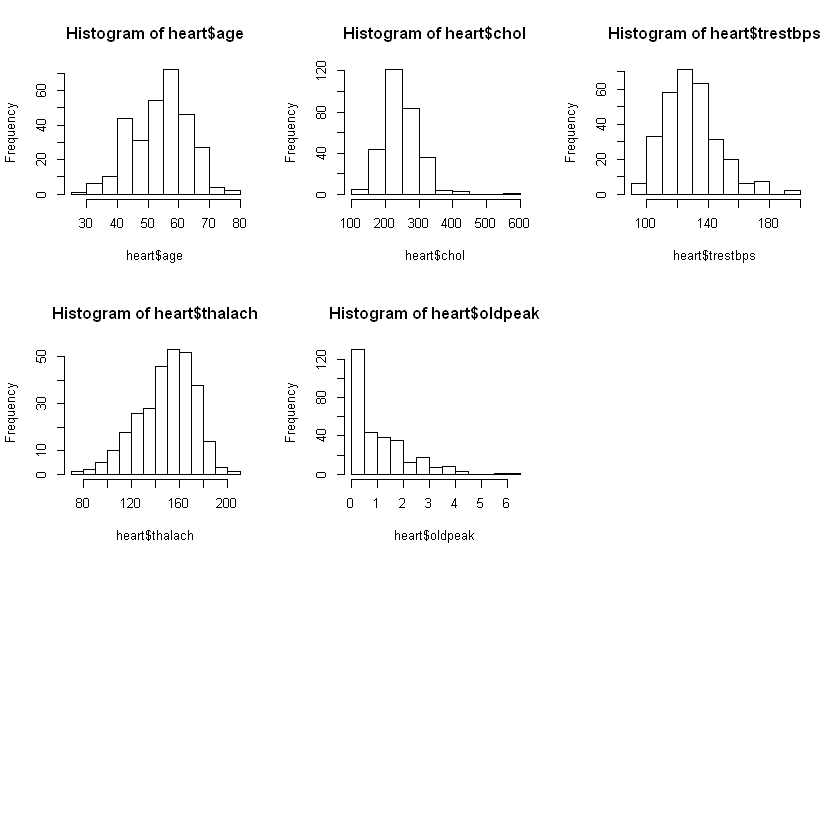

In [5]:
par(mfrow = c(3,3))

hist(heart$age)
hist(heart$chol)
hist(heart$trestbps)
hist(heart$thalach)
hist(heart$oldpeak)

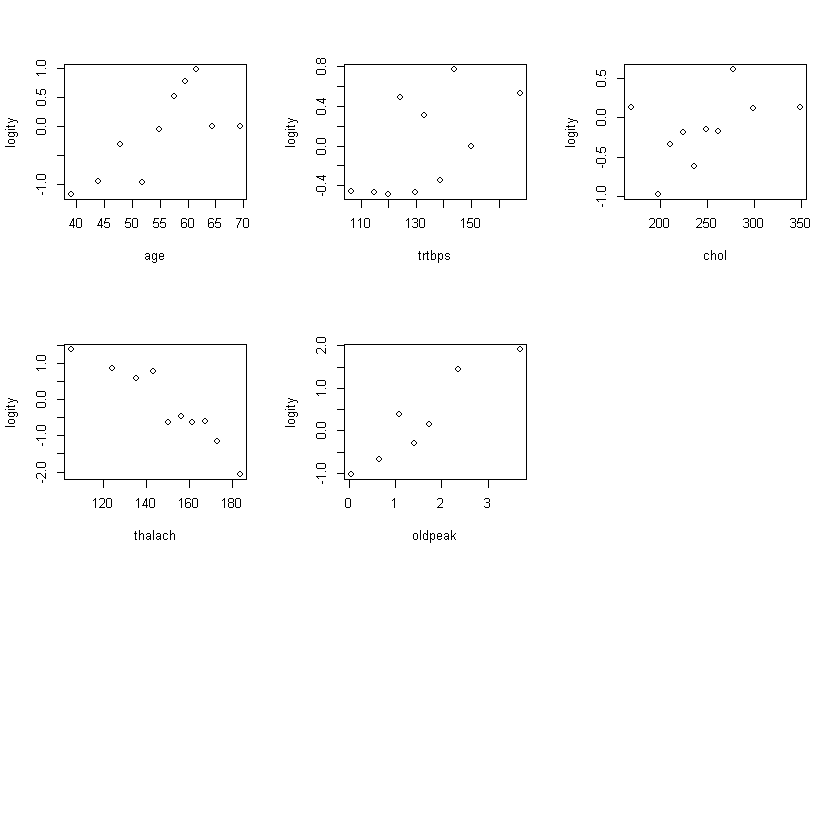

In [34]:
# logit plot on numeric data

logitplot<-function(y,x,ncat=10,...) {
    brksx<-unique(quantile(x,probs=(0:ncat)/ncat))
    nbrksx<-length(brksx)
    cutx<-cut(x,breaks=brksx,include.lowest=TRUE)
    yt<-table(data.frame(y,cutx))
    mx<-tapply(x,cutx,FUN=mean)
    logity<-log((yt[2,]+0.5)/(yt[1,]+0.5))
    plot(mx,logity,...)
}

par(mfrow = c(3,3))
logitplot(heart$num,heart$age, xlab = 'age')
logitplot(heart$num,heart$trestbps, xlab = 'trtbps')
logitplot(heart$num,heart$chol, xlab = 'chol')
logitplot(heart$num,heart$thalach, xlab = 'thalach')
logitplot(heart$num,heart$oldpeak, xlab = 'oldpeak')

- ไม่มีรูปแบบชัดเจนที่จะต้องพิจารณา transform ตัวแปร X

### Check Multicolinearity Problem

In [32]:
library(usdm)
vif(heart[,c(1,4,5,8,10)])

Variables,VIF
age,1.347358
trestbps,1.137604
chol,1.056714
thalach,1.330874
oldpeak,1.178751


- There's no Multicolinearity Problem

# Model Building
- Full model
- Reduce model using stepwise

### Full model

In [42]:
model <- glm(num~.,data=heart,family=binomial)
summary(model) 
# p-value based on wald's test


Call:
glm(formula = num ~ ., family = binomial, data = heart)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0490  -0.4847  -0.1213   0.3039   2.9086  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -6.253978   2.960399  -2.113 0.034640 *  
age                -0.023508   0.025122  -0.936 0.349402    
sexmale             1.670152   0.552486   3.023 0.002503 ** 
cpatypical          1.448396   0.809136   1.790 0.073446 .  
cpnon-anginal       0.393353   0.700338   0.562 0.574347    
cpasymptomatic      2.373287   0.709094   3.347 0.000817 ***
trestbps            0.027720   0.011748   2.359 0.018300 *  
chol                0.004445   0.004091   1.087 0.277253    
fbstrue            -0.574079   0.592539  -0.969 0.332622    
restecgstt          1.000887   2.638393   0.379 0.704424    
restecghypertrophy  0.486408   0.396327   1.227 0.219713    
thalach            -0.019695   0.011717  -1.681 0.092781 .  
exangyes       

### R-Square

In [50]:
library(rcompanion)
nagelkerke(model)$Pseudo.R.squared.for.model.vs.null

,Pseudo.R.squared
McFadden,0.553353
Cox and Snell (ML),0.534102
Nagelkerke (Cragg and Uhler),0.713568


### Reduced model (stepwise)

In [11]:
step_model <- step(model,direction='backward',trace=0)
summary(step_model)


Call:
glm(formula = num ~ sex + cp + trestbps + thalach + exang + oldpeak + 
    slope + ca + thal, family = binomial, data = heart)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0614  -0.4830  -0.1201   0.3257   2.9129  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -6.51296    2.45370  -2.654 0.007946 ** 
sexmale           1.55489    0.52222   2.977 0.002907 ** 
cpatypical        1.46339    0.79116   1.850 0.064359 .  
cpnon-anginal     0.30696    0.68387   0.449 0.653536    
cpasymptomatic    2.44156    0.69208   3.528 0.000419 ***
trestbps          0.02493    0.01070   2.329 0.019861 *  
thalach          -0.01493    0.01071  -1.394 0.163450    
exangyes          0.63056    0.43943   1.435 0.151300    
oldpeak           0.44279    0.22944   1.930 0.053623 .  
slopeflat         1.31410    0.47721   2.754 0.005893 ** 
slopedownsloping  0.56249    0.91149   0.617 0.537160    
ca1.0             2.16201    0.49319   4.

### R-square

In [51]:
library(rcompanion)
nagelkerke(step_model)$Pseudo.R.squared.for.model.vs.null

,Pseudo.R.squared
McFadden,0.611661
Cox and Snell (ML),0.570176
Nagelkerke (Cragg and Uhler),0.761718


### Compared Nested Models
- H0: Beta(age) = Beta(chol) = Beta(fbs) = Beta(restecg) = Beta(thalach) = 0 
- H1: not H0

In [13]:
# Compared Nested Model 
LRT<-deviance(step_model)-deviance(model)
1-pchisq(LRT, df.residual(step_model)-df.residual(model))

# prefer reduced model (step_model)

[1] 0.4613201

# Hypothesis testing for a single parameter H0: Beta(k) = 0 vs. Ha: Not H0 (alpha = 5%)
## Using likelihood Ratio Test (LRT) 

In [14]:
full_model <-glm(num~.,data=heart,family=binomial(link='logit'))

1. age

In [15]:
reduce_model <- update(full_model,.~.-age)
dif_deviance = deviance(reduce_model)-deviance(full_model)
pchisq(dif_deviance,df=1,lower=F)

[1] 0.3475487

There is no sufficient evidence to reject H0. Therefore, age is not associated with heart attack at 5% level of significance

2. Sex

In [16]:
reduce_model <- update(full_model,.~.-sex)
dif_deviance = deviance(reduce_model)-deviance(full_model)
pchisq(dif_deviance,df=1,lower=F)

[1] 0.001607119

There is sufficient evidence to reject H0. Therefore, gender is associated with heart attack at 5% level of significance

3. cp

In [17]:
reduce_model <- update(full_model,.~.-cp)
dif_deviance = deviance(reduce_model)-deviance(full_model)
pchisq(dif_deviance,df=1,lower=F)

[1] 3.925526e-06

There is sufficient evidence to reject H0. Therefore, chest pain type is associated with heart attack at 5% level of significance

4. trestbps

In [18]:
reduce_model <- update(full_model,.~.-trestbps)
dif_deviance = deviance(reduce_model)-deviance(full_model)
pchisq(dif_deviance,df=1,lower=F)

[1] 0.01528565

There is sufficient evidence to reject H0. Therefore, resting blood pressure is associated with heart attack at 5% level of significance

5. chol

In [19]:
reduce_model <- update(full_model,.~.-chol)
dif_deviance = deviance(reduce_model)-deviance(full_model)
pchisq(dif_deviance,df=1,lower=F)

[1] 0.283502

There is not sufficient evidence to reject H0. Therefore, cholestoral is not associated with heart attack at 5% level of significance

6. fbs

In [20]:
reduce_model <- update(full_model,.~.-fbs)
dif_deviance = deviance(reduce_model)-deviance(full_model)
pchisq(dif_deviance,df=1,lower=F)

[1] 0.328134

There is not sufficient evidence to reject H0. Therefore, fasting blood sugar is not associated with heart attack at 5% level of significance

7. restecg

In [21]:
reduce_model <- update(full_model,.~.-restecg)
dif_deviance = deviance(reduce_model)-deviance(full_model)
pchisq(dif_deviance,df=1,lower=F)

[1] 0.2053539

There is not sufficient evidence to reject H0. Therefore, resting electrocardiographic results is not associated with heart attack at 5% level of significance

8. thalach

In [22]:
reduce_model <- update(full_model,.~.-thalach)
dif_deviance = deviance(reduce_model)-deviance(full_model)
pchisq(dif_deviance,df=1,lower=F)

[1] 0.08534896

There is not sufficient evidence to reject H0. Therefore, maximum heart rate achieved is not associated with heart attack at 5% level of significance

9. exang

In [23]:
reduce_model <- update(full_model,.~.-exang)
dif_deviance = deviance(reduce_model)-deviance(full_model)
pchisq(dif_deviance,df=1,lower=F)

[1] 0.1457288

There is not sufficient evidence to reject H0. Therefore, exercise induced angina is not associated with heart attack at 5% level of significance

10. oldpeak

In [24]:
reduce_model <- update(full_model,.~.-oldpeak)
dif_deviance = deviance(reduce_model)-deviance(full_model)
pchisq(dif_deviance,df=1,lower=F)

[1] 0.09557775

There is not sufficient evidence to reject H0. Therefore, ST depression induced by exercise relative to rest is not associated with heart attack at 5% level of significance

11. slope

In [25]:
reduce_model <- update(full_model,.~.-slope)
dif_deviance = deviance(reduce_model)-deviance(full_model)
pchisq(dif_deviance,df=1,lower=F)

[1] 0.005575814

There is sufficient evidence to reject H0. Therefore, the slope of the peak exercise ST segment is associated with heart attack at 5% level of significance

12. ca

In [26]:
reduce_model <- update(full_model,.~.-ca)
dif_deviance = deviance(reduce_model)-deviance(full_model)
pchisq(dif_deviance,df=1,lower=F)

[1] 1.243141e-09

There is sufficient evidence to reject H0. Therefore, number of major vessels is associated with heart attack at 5% level of significance

13. thall

In [27]:
reduce_model <- update(full_model,.~.-thal)
dif_deviance = deviance(reduce_model)-deviance(full_model)
pchisq(dif_deviance,df=1,lower=F)

[1] 0.0003493919

There is sufficient evidence to reject H0. Therefore, Thal rate is associated with heart attack at 5% level of significance

## Accuracy on Unseen Data

In [28]:
n<-nrow(heart)
fold<-5
# fold<-10
nfold<-round(n/fold)

# neachfold<-c(rep(30,7), rep(29,3))
neachfold<-c(rep(59,4), rep(61,1))

randind<-sample(1:n, n)
foldind<-rep(NA, n)

for (i in 1:fold)
{
  if (i==1)
  {
    foldind[sort(randind[1:sum(neachfold[1:i])])]<-i
  }
  else
  {
    foldind[sort(randind[(sum(neachfold[1:(i-1)])+1):sum(neachfold[1:i])])]<-i
  }
}

In [29]:
acc_model<-rep(NA, 5)
acc_step<-rep(NA, 5)

for (i in 1:fold)
{
    traindata<-heart[foldind!=i,]
    testdata<-heart[foldind==i,]

    model <- glm(num~.,data=traindata,family=binomial)
    pred<-predict(model, testdata,type='response')
    testdata['pred_prob_model'] <- pred  
    testdata['predict_model'] <- ifelse(testdata$pred_prob_model >0.5,1,0)

    step_model <- step(model,direction='backward',trace=0)
    pred<-predict(step_model, testdata,type='response')
    testdata['pred_prob_step'] <- pred  
    testdata['predict_step'] <- ifelse(testdata$pred_prob_step >0.5,1,0)
    
    accuracy1 <- nrow(testdata[testdata$num==testdata$predict_model,])/nrow(testdata)
    acc_model[i]<-accuracy1
    
    accuracy2 <- nrow(testdata[testdata$num==testdata$predict_step,])/nrow(testdata)
    acc_step[i]<-accuracy2
}

sum(acc_model)/fold
sum(acc_step)/fold

[1] 0.8286746

[1] 0.818394

In [30]:
acc_model
acc_step

[1] 0.7966102 0.8305085 0.8135593 0.9322034 0.7704918

[1] 0.7796610 0.7796610 0.8135593 0.9322034 0.7868852

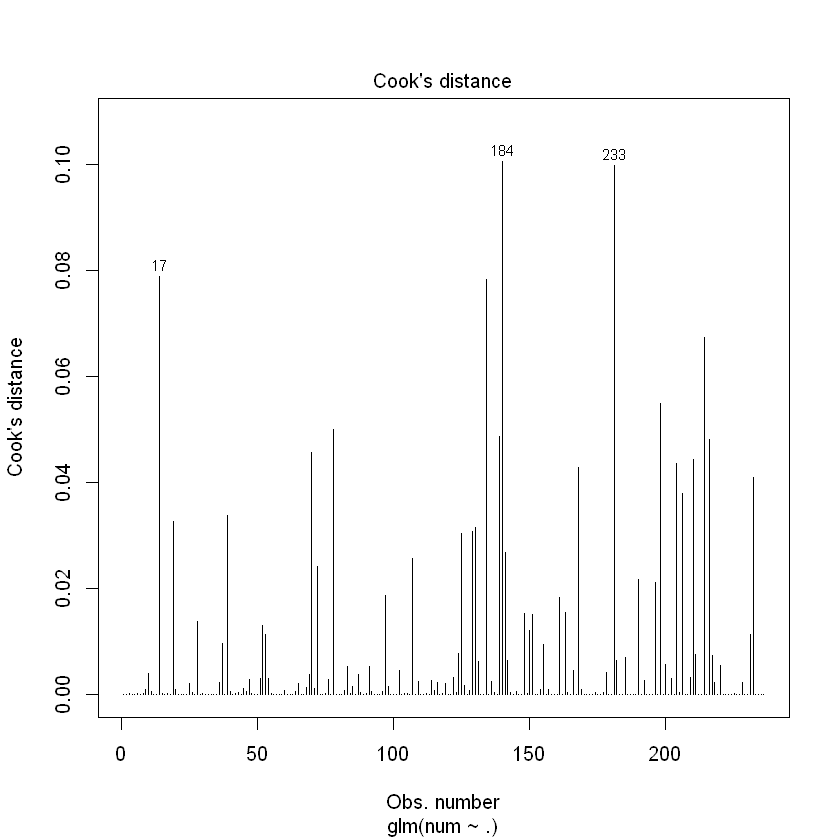

In [31]:
plot(model,4)